# Linear Regression
Reference: https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902

Dataset source: https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021

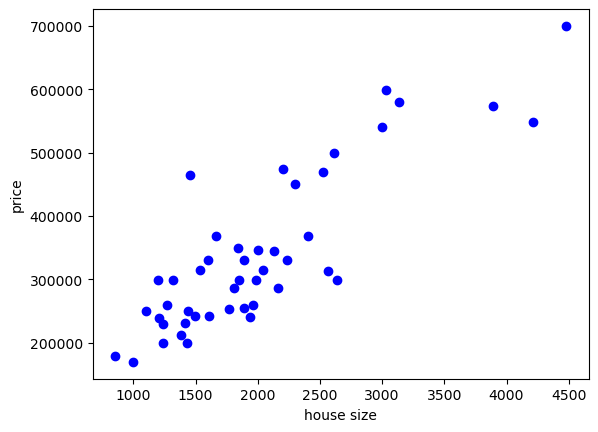

Cost:  tensor([[2.0865e+09]])
Parameters:  tensor([[3.3737e+05],
        [1.0489e+05],
        [2.5125e+02]])


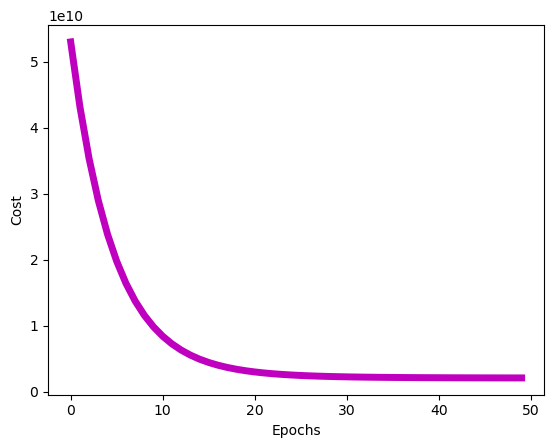

Price of house:  tensor([1.6817e+08])


In [2]:
# Simple dataset
import torch
import matplotlib.pyplot as plt
import pandas as pd

# variables to store mean and standard deviation for each feature
mu = []
std = []


def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = torch.tensor(df.values, dtype=torch.float32)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]


def plot_data(x, y):
    plt.xlabel("house size")
    plt.ylabel("price")
    plt.plot(x[:, 0], y, "bo")
    plt.show()


def normalize(data):
    for i in range(0, data.shape[1] - 1):
        data[:, i] = (data[:, i] - torch.mean(data[:, i])) / torch.std(data[:, i])
        mu.append(torch.mean(data[:, i]))
        std.append(torch.std(data[:, i]))


def h(x, theta):
    return torch.matmul(x, theta)


def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])


def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all


def plot_cost(J_all, num_epochs):
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(num_epochs, J_all, "m", linewidth="5")
    plt.show()


def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)


x, y = load_data("../../../datasets/house_price/house_price_data.txt")
y = torch.reshape(y, (46, 1))
x = torch.hstack((torch.ones((x.shape[0], 1)), x))
theta = torch.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

# for testing and plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = torch.tensor(jplot)
n_epochs = torch.tensor(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 3])

In [3]:
# Complex dataset
import torch
import matplotlib.pyplot as plt
import pandas as pd

# variables to store mean and standard deviation for each feature
mu = []
std = []


def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.fillna(0, inplace=True)
    columns_of_interest = [
        "livingArea",
        "bathrooms",
        "bedrooms",
        "favoriteCount",
        "lastSoldPrice",
        "pageViewCount",
        "price",
    ]

    extracted_data = df[columns_of_interest]
    data = torch.tensor(extracted_data.values, dtype=torch.float32)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]


def plot_data(x, y):
    plt.xlabel("house size")
    plt.ylabel("price")
    plt.plot(x[:, 0], y, "bo")
    plt.show()


def normalize(data):
    for i in range(0, data.shape[1] - 1):
        data[:, i] = (data[:, i] - torch.mean(data[:, i])) / torch.std(data[:, i])
        mu.append(torch.mean(data[:, i]))
        std.append(torch.std(data[:, i]))


def h(x, theta):
    return torch.matmul(x, theta)


def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])


def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all


def plot_cost(J_all, num_epochs):
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(num_epochs, J_all, "m", linewidth="5")
    plt.show()


def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

/tmp/ipykernel_400483/530900751.py:11: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=",", index_col=False)


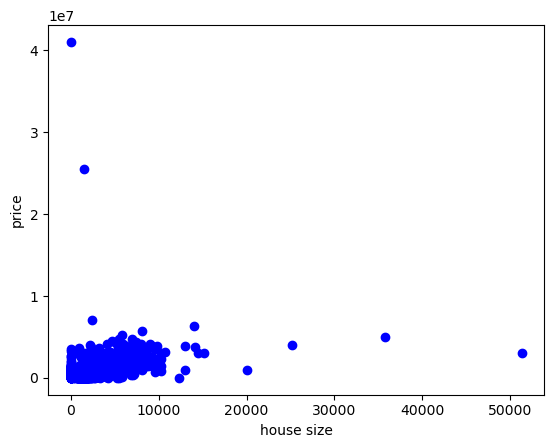

Training size: 20584, Testing size: 5147
Test cost:  130409684992.0
Test cost:  103503478784.0
Test cost:  82626461696.0
Test cost:  66427547648.0
Test cost:  53866029056.0
Test cost:  44138074112.0
Test cost:  36621127680.0
Test cost:  30830262272.0
Test cost:  26387582976.0
Test cost:  22997217280.0
Test cost:  20427839488.0
Test cost:  18497914880.0
Test cost:  17064792064.0
Test cost:  16016670720.0
Test cost:  15265721344.0
Test cost:  14742892544.0
Test cost:  14394199040.0
Test cost:  14177368064.0
Test cost:  14059339776.0
Test cost:  14014374912.0
Test cost:  14022562816.0
Test cost:  14068420608.0
Test cost:  14140138496.0
Test cost:  14228718592.0
Test cost:  14327216128.0
Test cost:  14430617600.0
Test cost:  14535145472.0
Test cost:  14638044160.0
Test cost:  14737415168.0
Test cost:  14831912960.0
Test cost:  14920757248.0
Test cost:  15003431936.0
Test cost:  15079827456.0
Test cost:  15149812736.0
Test cost:  15213652992.0
Test cost:  15271435264.0
Test cost:  153235630

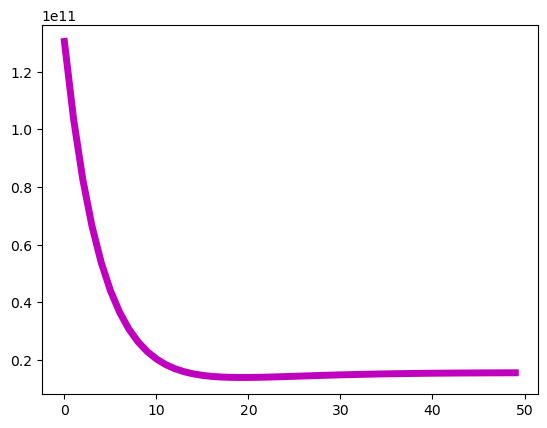

In [109]:
# baseline

x, y = load_data("../../../datasets/house_price/portland_housing.csv")
y = torch.reshape(y, (x.shape[0], 1))
x = torch.hstack((torch.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4 / 5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

theta = torch.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50

J_test = []

for i in range(num_epochs):
    theta, J_all = gradient_descent(x_train, y_train, theta, learning_rate, 1)
    # Test
    J = cost_function(x_test, y_test, theta)
    J_test.append(J[0][0].item())
    print("Test cost: ", J[0][0].item())

# for testing and plotting cost
plt.plot(range(num_epochs), J_test, "m", linewidth="5")

tensor([110,  94,  98,  88,  82], dtype=torch.int32)


/tmp/ipykernel_11170/4256874198.py:12: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=",", index_col=False)


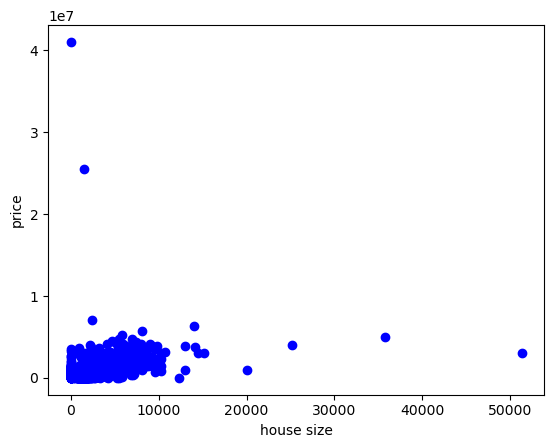

Training size: 20584, Testing size: 5147
Round 0, theta: tensor([[584178.3125],
        [206050.5625],
        [ 29010.2734]])
Test cost:  tensor([[1.4376e+10]])
Round 1, theta: tensor([[586412.9375],
        [228190.8125],
        [  9575.5527]])
Test cost:  tensor([[1.4333e+10]])
Round 2, theta: tensor([[585810.5625],
        [235038.1250],
        [  3160.6108]])
Test cost:  tensor([[1.4314e+10]])
Round 3, theta: tensor([[585607.4375],
        [237238.9062],
        [  1095.8696]])
Test cost:  tensor([[1.4316e+10]])
Round 4, theta: tensor([[5.8554e+05],
        [2.3795e+05],
        [4.3166e+02]])
Test cost:  tensor([[1.4317e+10]])


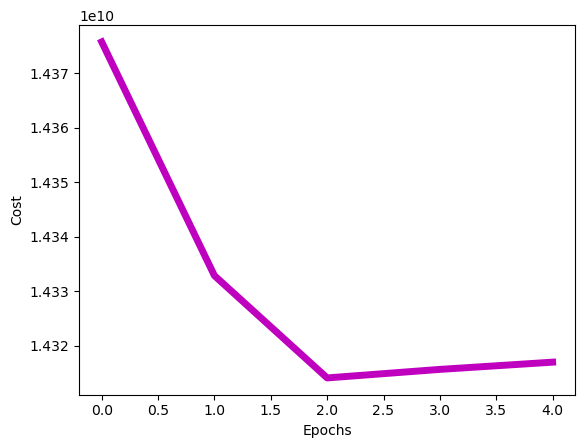

In [7]:
# Federated
torch.random.seed()
num_device = 5
per_device_size = torch.empty(num_device).normal_(mean=100, std=10)
per_device_size = per_device_size.int()
print(per_device_size)

# Import & visualize
x, y = load_data("../../../datasets/house_price/portland_housing.csv")
y = torch.reshape(y, (x.shape[0], 1))
x = torch.hstack((torch.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4 / 5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

# Partition
per_device_idx = [torch.randperm(train_size)[:per_device_size[i]] for i in range(num_device)]
x_data_device = [x_train[per_device_idx[i], :] for i in range(num_device)]
y_data_device = [y_train[per_device_idx[i], :] for i in range(num_device)]

theta = torch.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
num_round = 5

J_test = []

for i in range(num_round):
    theta_next = torch.zeros((x.shape[1], 1))
    for j in range(num_device):
        theta_local, _ = gradient_descent(x_data_device[j], y_data_device[j], theta, learning_rate, num_epochs)
        theta_next += per_device_size[j] / sum(per_device_size) * theta_local

    theta = theta_next
    print(f"Round {i}, theta: {theta}")

    # Test
    J = cost_function(x_test, y_test, theta)
    J_test.append(J[0][0])
    print("Test cost: ", J)

# plotting cost
plot_cost(J_test, range(num_round))